# Say "Hello!" by RNN

## ANN - RNN: sigmoid - none

0 -th epoch trained


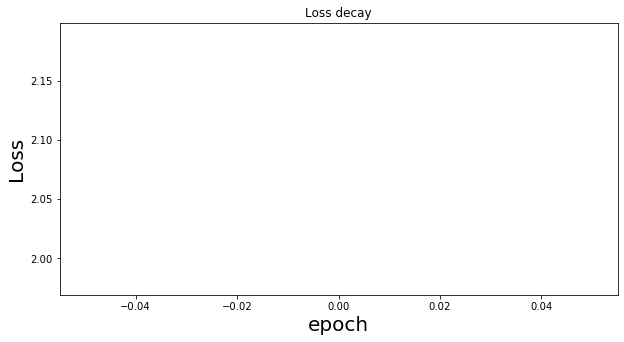

50 -th epoch trained


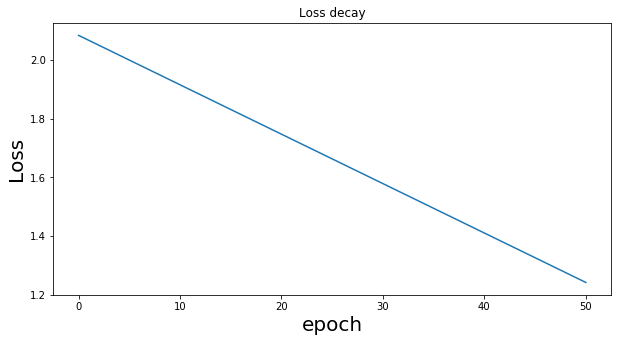

100 -th epoch trained


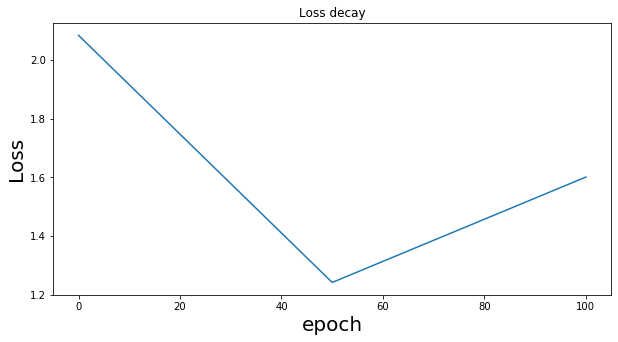

150 -th epoch trained


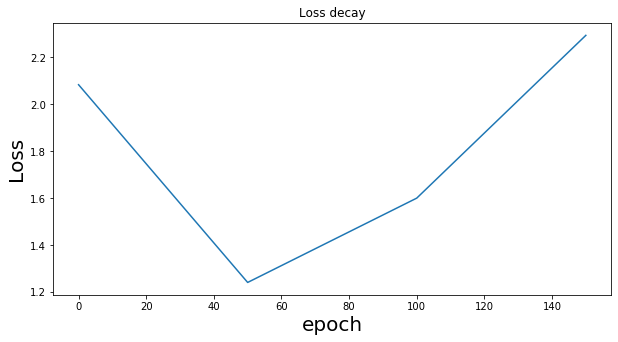

200 -th epoch trained


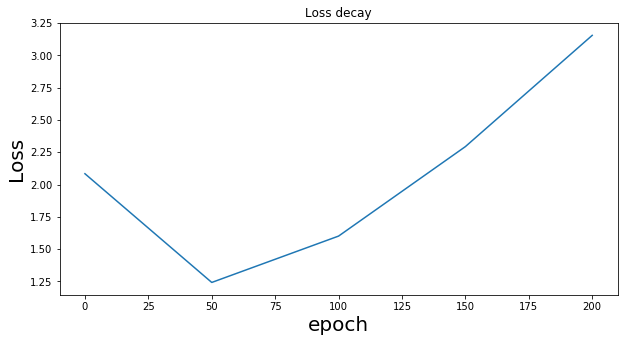

250 -th epoch trained


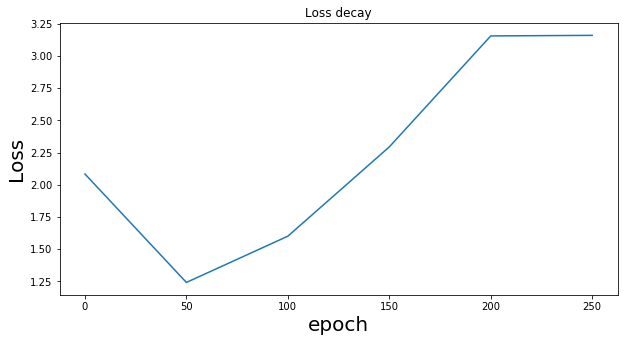

300 -th epoch trained


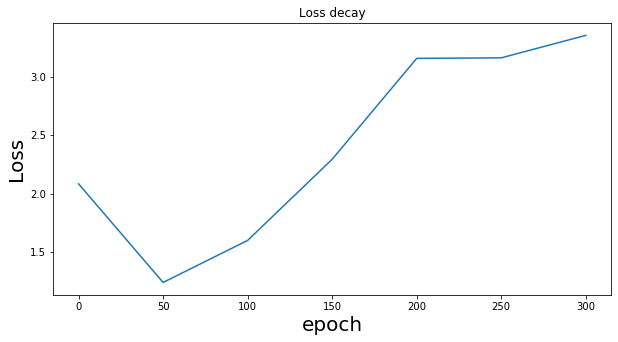

350 -th epoch trained


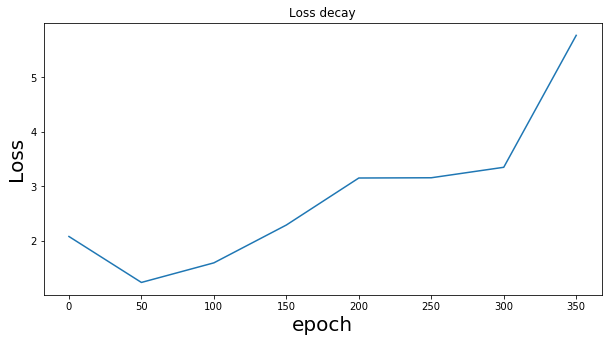

400 -th epoch trained


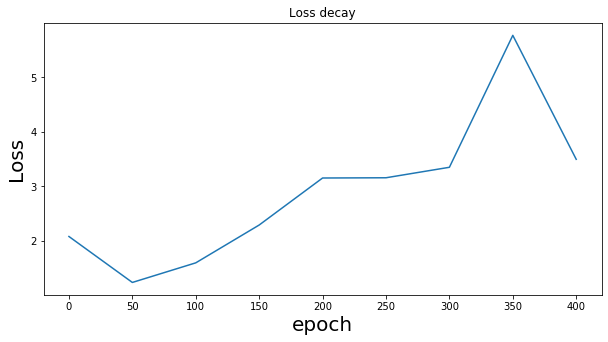

450 -th epoch trained


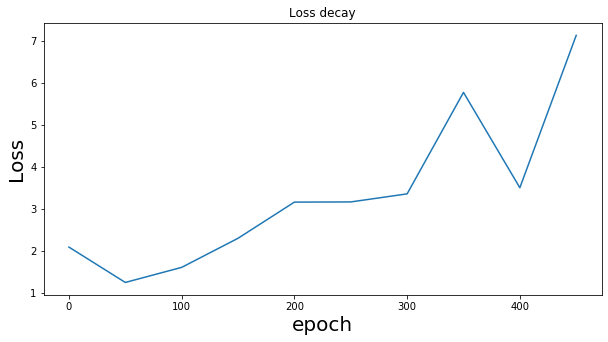

500 -th epoch trained


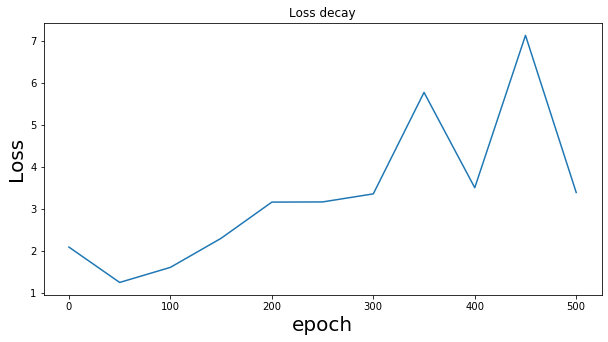

550 -th epoch trained


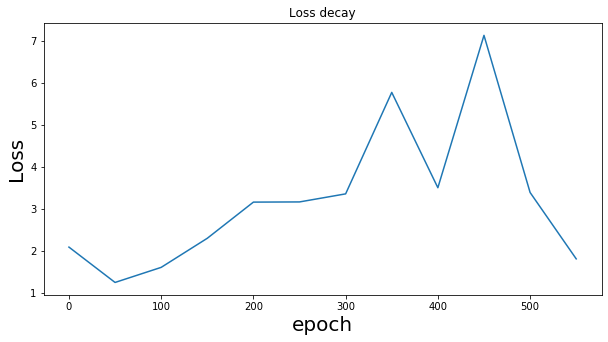

600 -th epoch trained


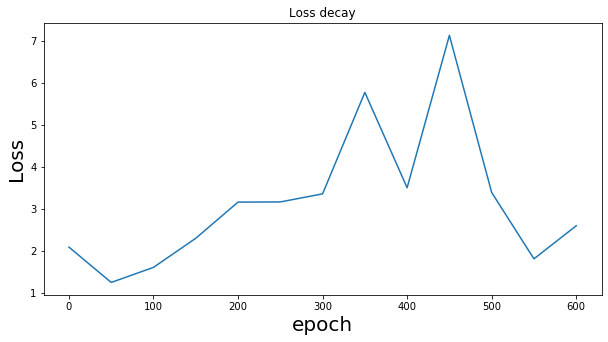

650 -th epoch trained


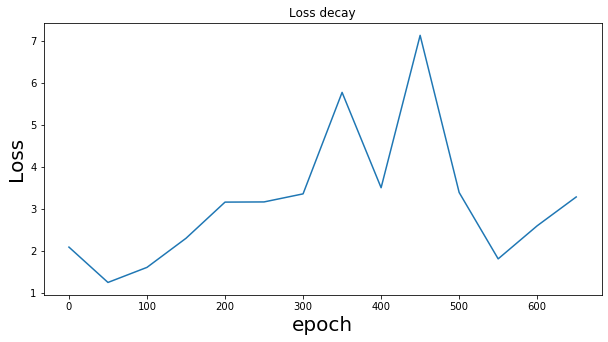

700 -th epoch trained


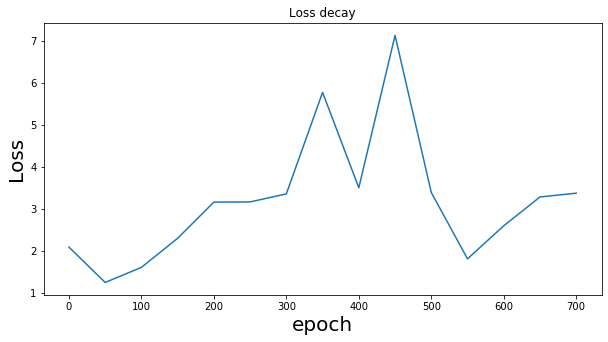

750 -th epoch trained


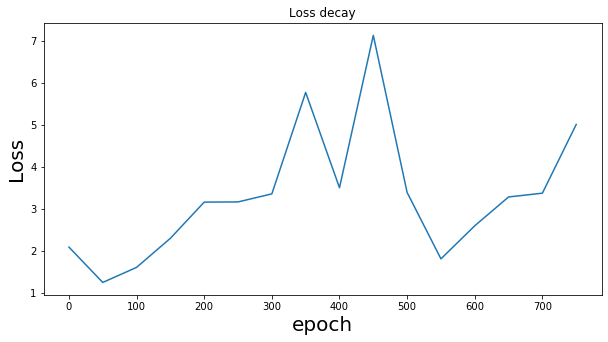

800 -th epoch trained


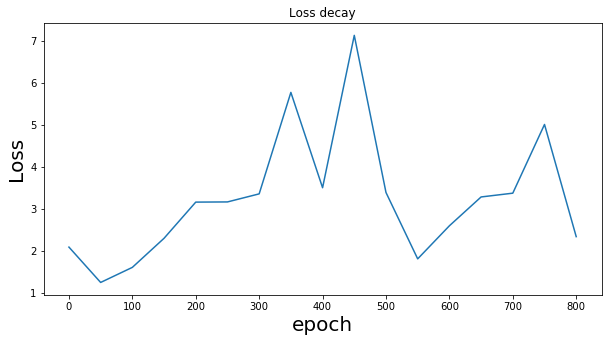

850 -th epoch trained


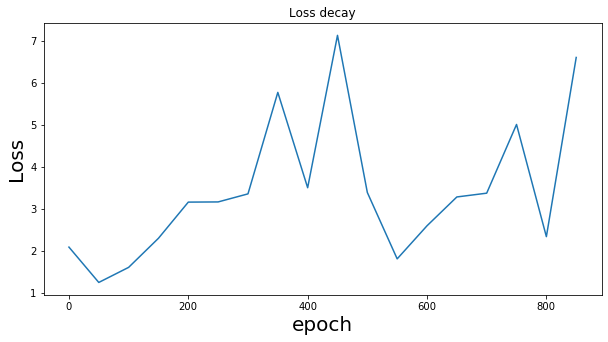

900 -th epoch trained


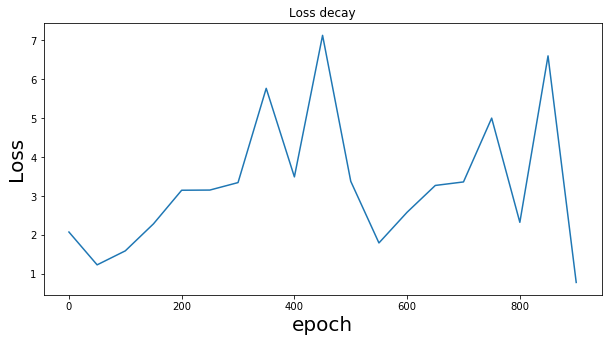

950 -th epoch trained


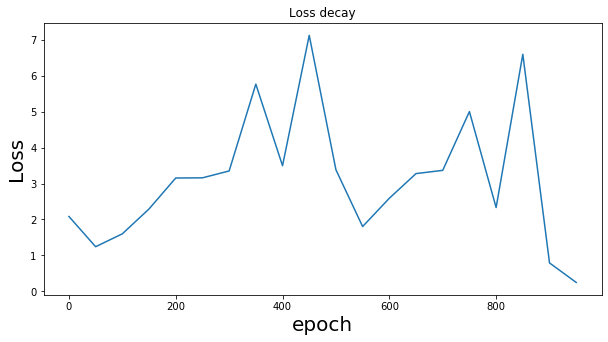

1000 -th epoch trained


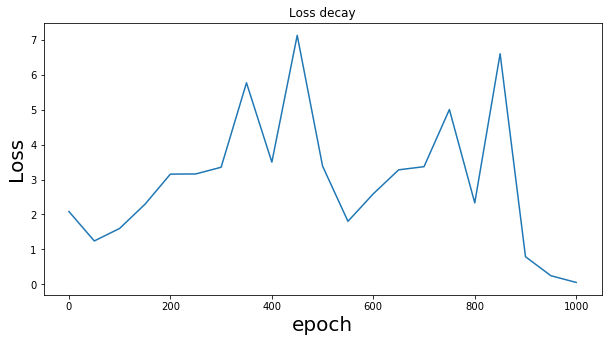

1050 -th epoch trained


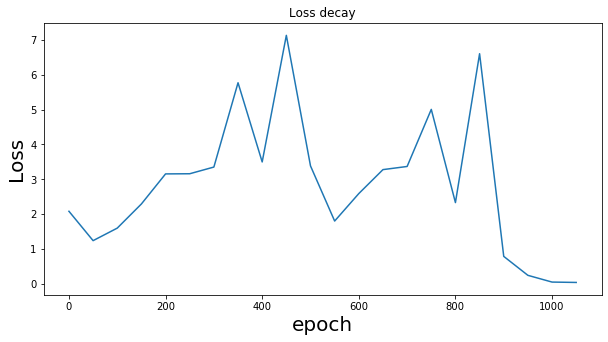

1100 -th epoch trained


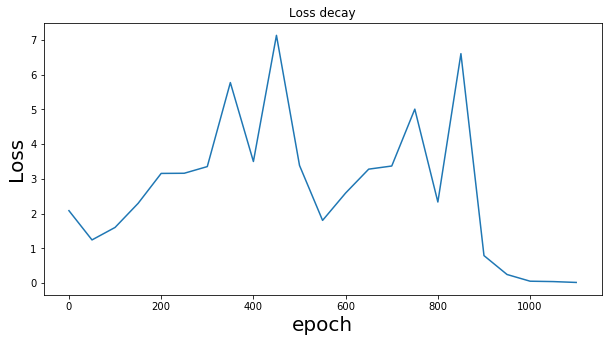

1150 -th epoch trained


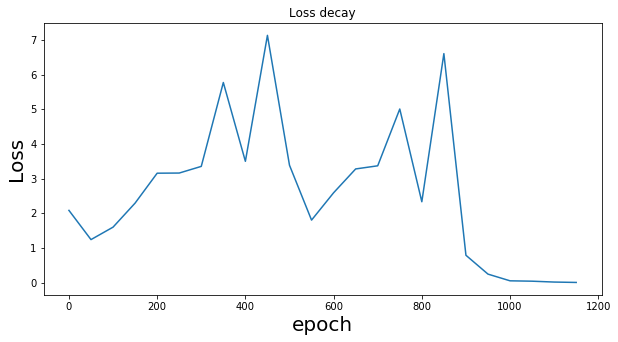

1200 -th epoch trained


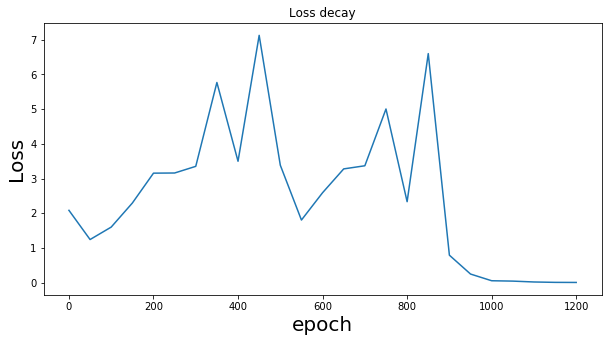

1250 -th epoch trained


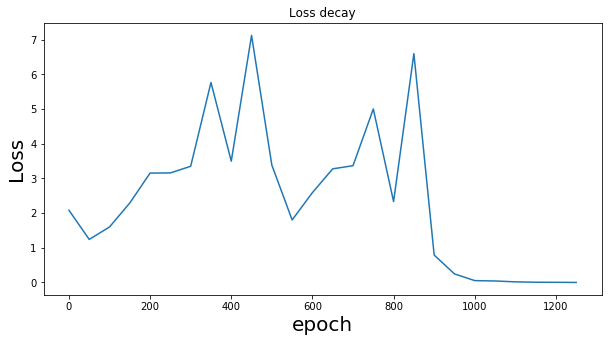

1300 -th epoch trained


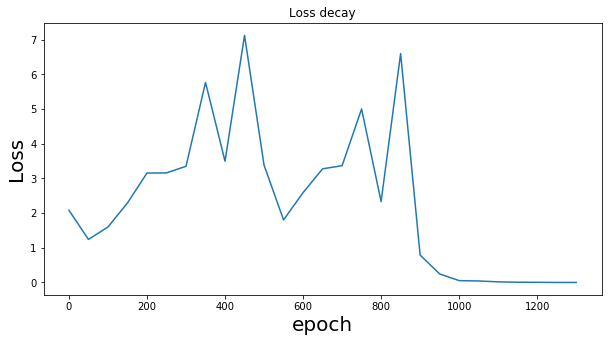

1350 -th epoch trained


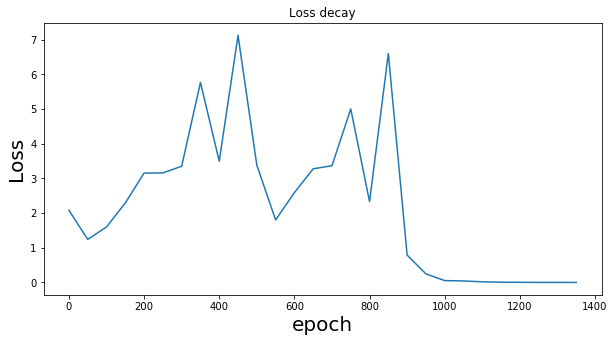

1400 -th epoch trained


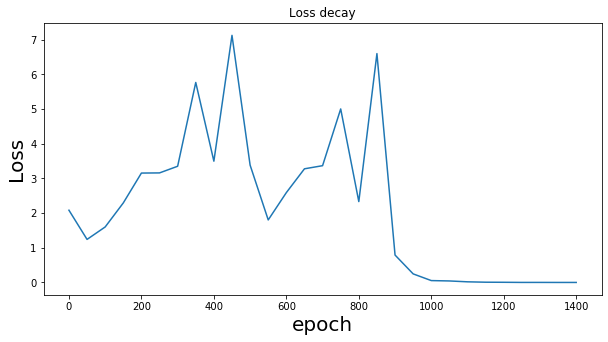

1450 -th epoch trained


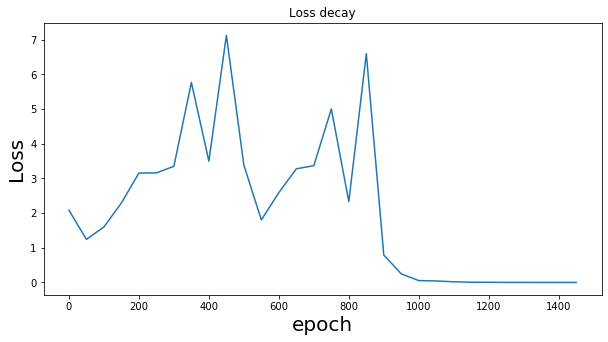

1500 -th epoch trained


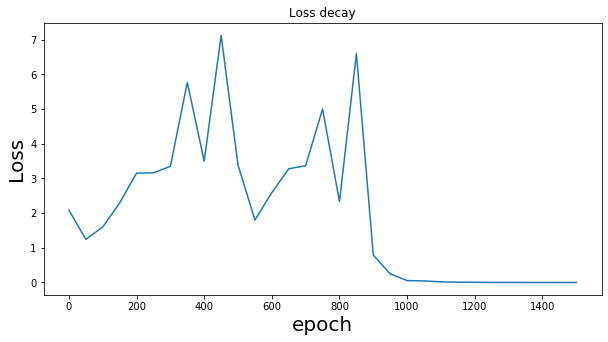

1550 -th epoch trained


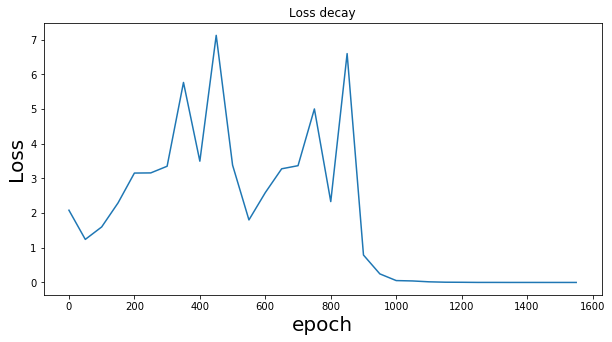

1600 -th epoch trained


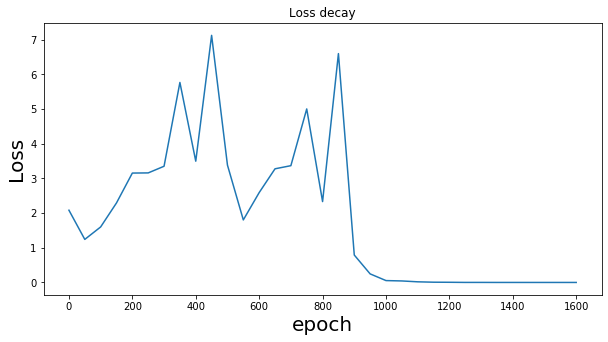

1650 -th epoch trained


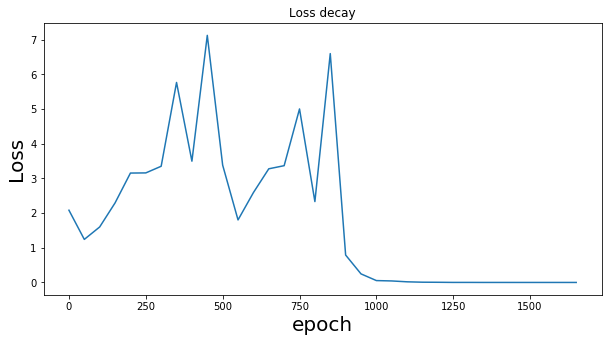

1700 -th epoch trained


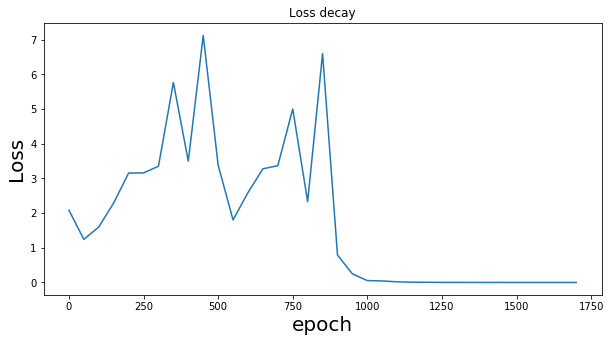

1750 -th epoch trained


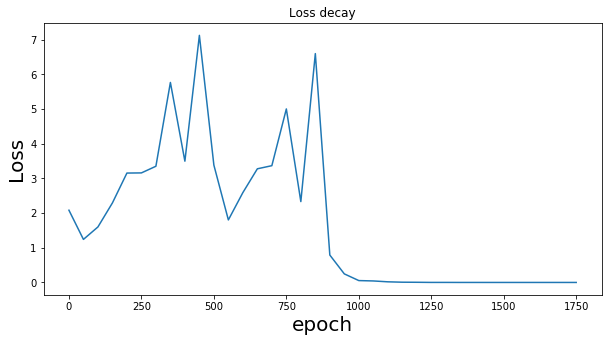

1800 -th epoch trained


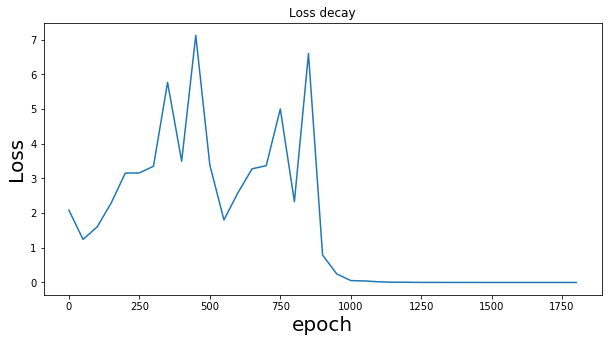

1850 -th epoch trained


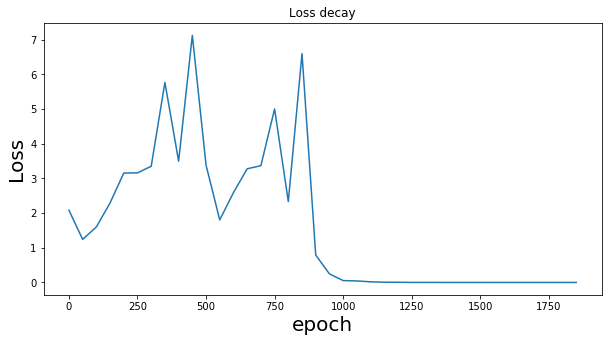

1900 -th epoch trained


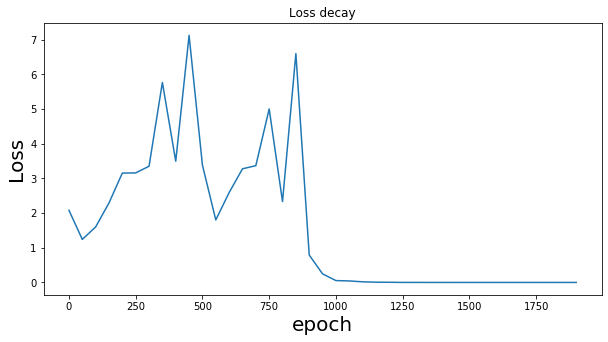

1950 -th epoch trained


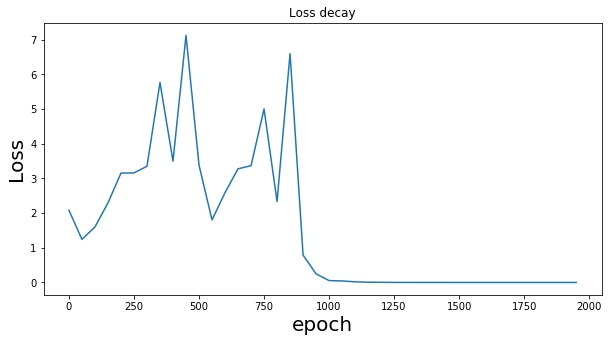

2000 -th epoch trained


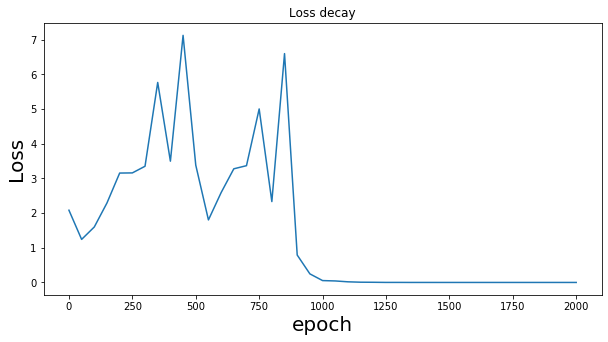

2050 -th epoch trained


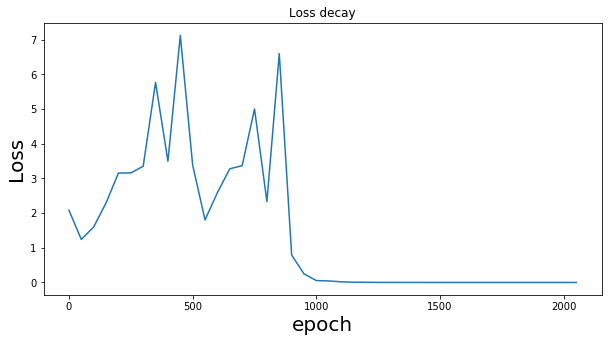

2100 -th epoch trained


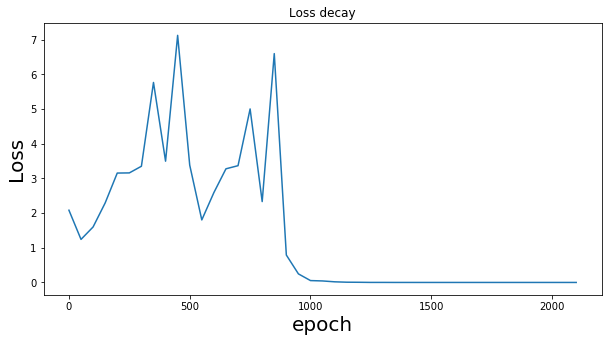

2150 -th epoch trained


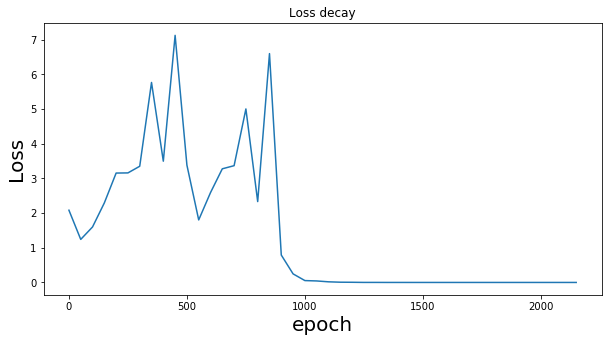

2200 -th epoch trained


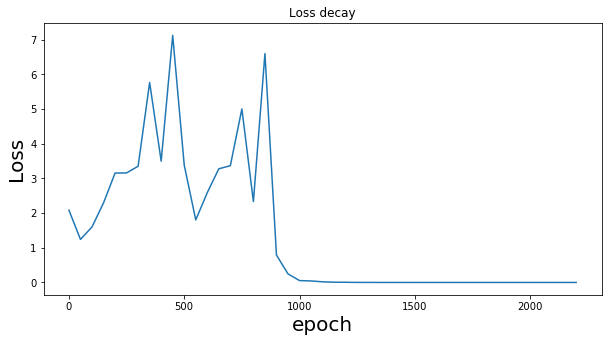

2250 -th epoch trained


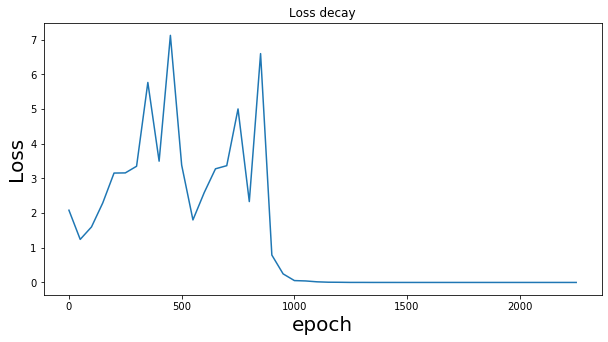

2300 -th epoch trained


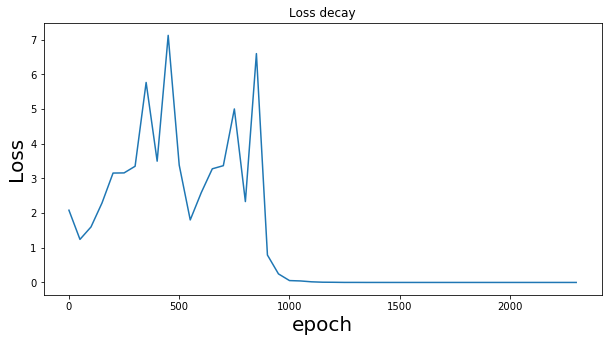

2350 -th epoch trained


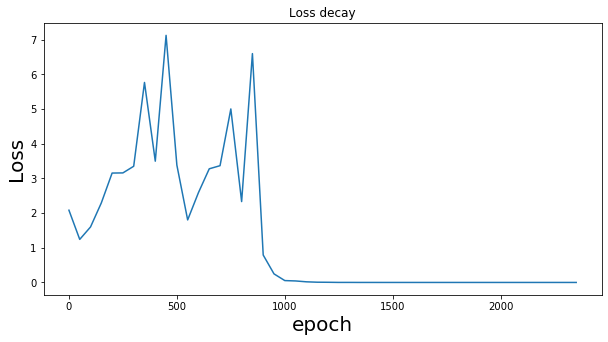

2400 -th epoch trained


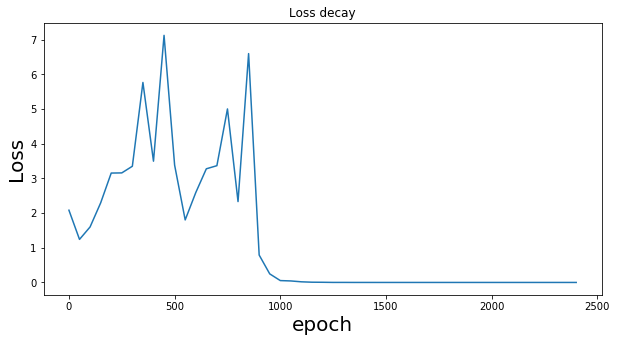

2450 -th epoch trained


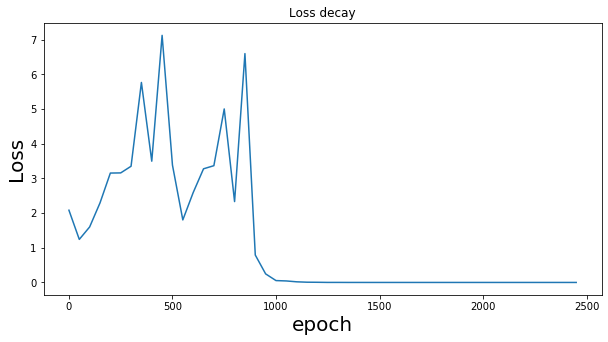

2500 -th epoch trained


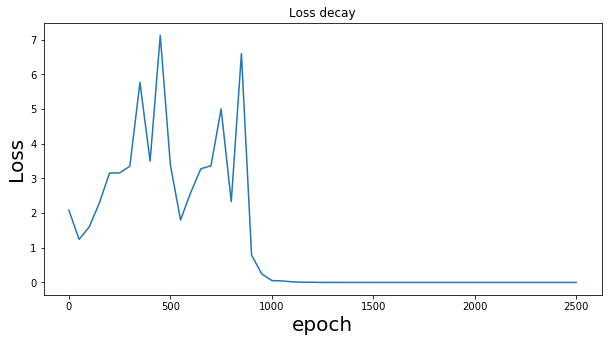

2550 -th epoch trained


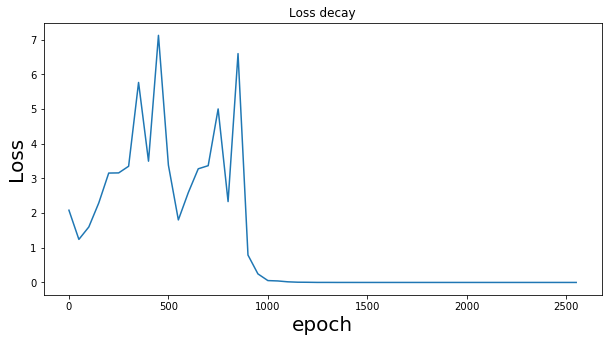

2600 -th epoch trained


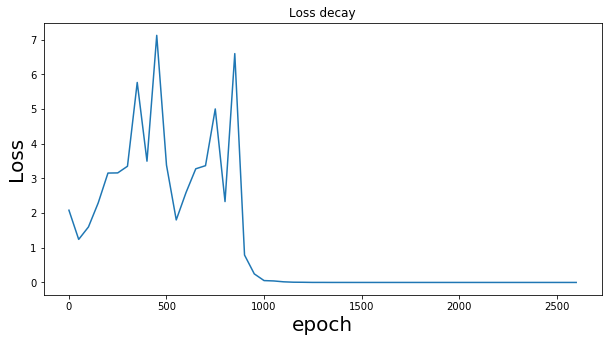

2650 -th epoch trained


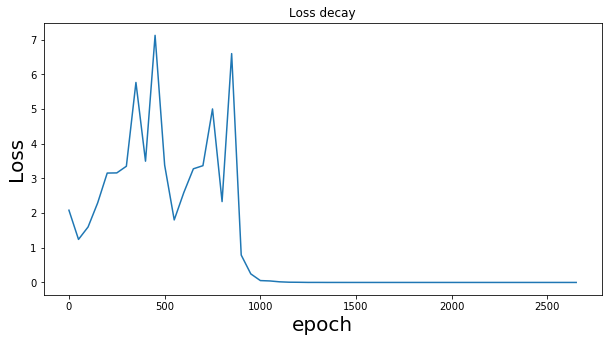

2700 -th epoch trained


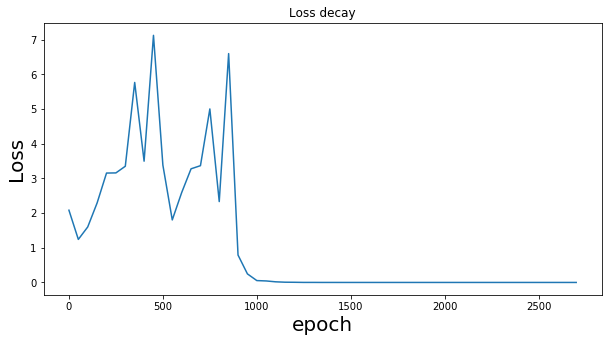

2750 -th epoch trained


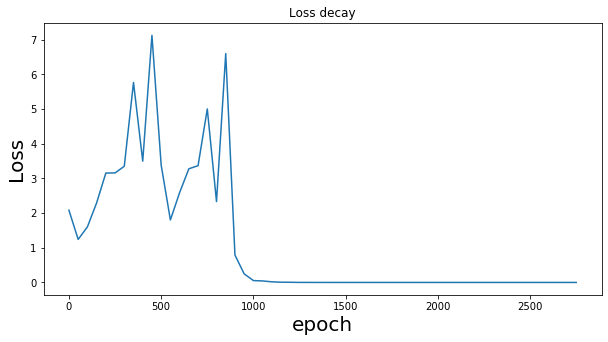

2800 -th epoch trained


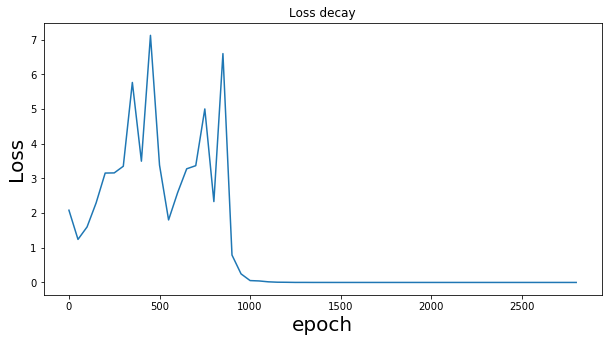

2850 -th epoch trained


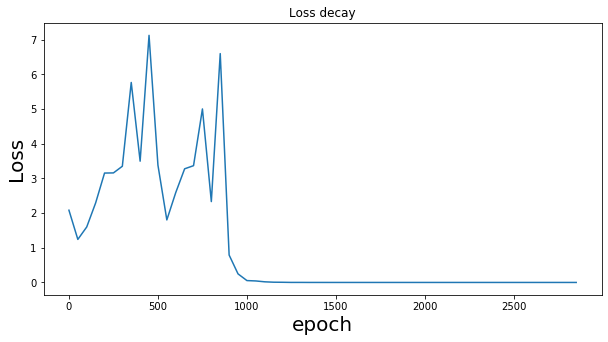

2900 -th epoch trained


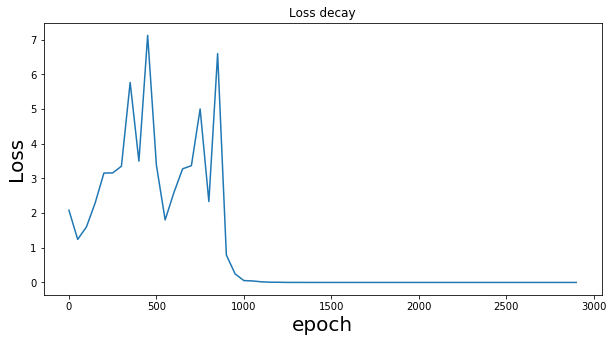

2950 -th epoch trained


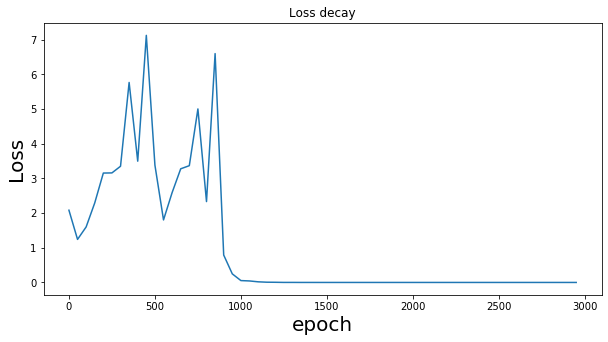

[ 0.11183597  1.54950646  1.46898637 -2.01909099]
[ 0.01395185  0.4137557   3.08614587 -2.42651015]
[-3.03207497e-04  1.75047399e-01  1.70976550e+00 -8.68386876e-01]
[ 3.95656824e-04  6.25377215e-02 -2.05257063e-01  1.14797491e+00]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# input = [[0,0,1],[0,1,1],[1,0,1],[1,1,1]]
# output = [0,1,1,0]

# HELLO ! --> H:[1 0 0 0], E:[0 1 0 0], L:[0 0 1 0], O:[0 0 0 1]
H=[1,0,0,0]; E=[0,1,0,0]; L=[0,0,1,0]; O=[0,0,0,1]; 
output = [E, L, L, O]
input = [H, E, L, L] 


N = np.size(input,0) # number of samples

Ni = np.size(input,1) # dimension of the samples of input

No = np.size(output,1) # dimension of the sample of output

Nh = 20 # number of hidden units


Ws = 2/np.sqrt(Ni+1)*(np.random.rand(Nh,Ni+1) - 0.5) # Xavier initialization

Wo = 2/np.sqrt(Nh)*(np.random.rand(No,Nh) - 0.5)  # Xavier initialization



alpha = 0.1 # Learning rate

t_ = []

loss_ = []

def sigmoid(x):
    f = 1/(1+np.exp(-x))
    return f

## train the model ====================================================================
h0 = np.zeros(Ni+1)
for epoch in range(0,3000):
    loss = 0
    for id_ in range(0,N):
        dWs = 0*Ws
        dWo = 0*Wo
        
        x = np.append(input[id_],1) + h0[:Ni+1]
        
        S = np.dot(Ws,x)
        
        if id_ != N:
            h0 = sigmoid(S);
        else:
            h0 = 0*sigmoid(S);
     

        y = np.dot(Wo,sigmoid(S))
        
        d = output[id_]
            
        for j in range(0,Nh):
            for i in range(0,No):
                dWo[i,j] = dWo[i,j] + sigmoid(S[j])*(y[i]-d[i])
                
        Wo = Wo - alpha*dWo
        
        for k in range(0,Ni+1):
            for j in range(0,Nh):
                for i in range(0,No):
                    dWs[j,k] = dWs[j,k] + x[k]*Wo[i,j]*sigmoid(S[j])*(1-sigmoid(S[j]))*(y[i]-d[i]) 
        
        Ws = Ws - alpha*dWs
        
        loss = loss + 1/2*np.linalg.norm(y-d)
        
    if np.mod(epoch,50) == 0:
        print(epoch,"-th epoch trained")
            
        t_ = np.append(t_,epoch)
            
        loss_ = np.append(loss_,loss)
            
        plt.figure(num=0,figsize=[10,5])
        plt.plot(t_,loss_,marker="")
        plt.title('Loss decay')
        plt.xlabel('epoch',FontSize=20)
        plt.ylabel('Loss',FontSize=20)
        plt.show()
        print('====================================================================')

## test the trained model ====================================================================
h0 = np.zeros(Ni+1)
for id_ in range(0,N):
    x = np.append(input[id_],1) + h0[:Ni+1]
        
    S = np.dot(Ws,x)

    h0 = sigmoid(S);
        
    y = np.dot(Wo,sigmoid(S))
    
    print(y)







## ANN - RNN: sigmoid - sigmoid

0 -th epoch trained


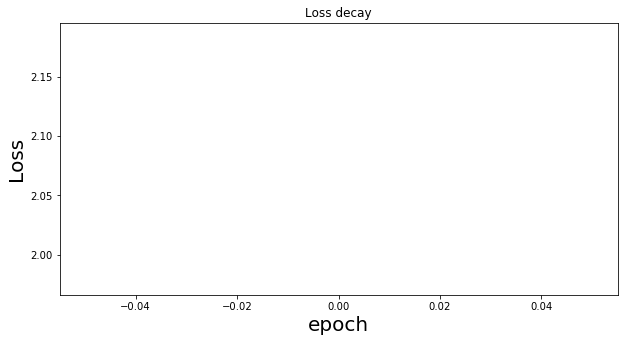

50 -th epoch trained


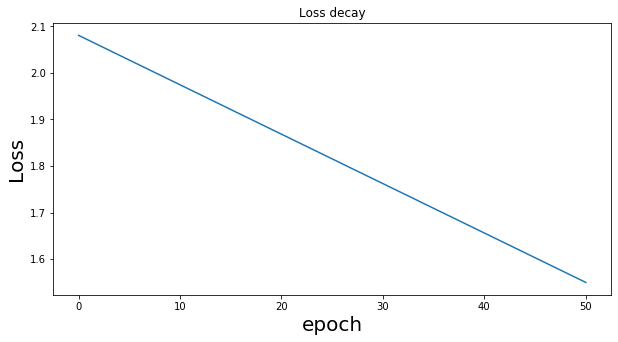

100 -th epoch trained


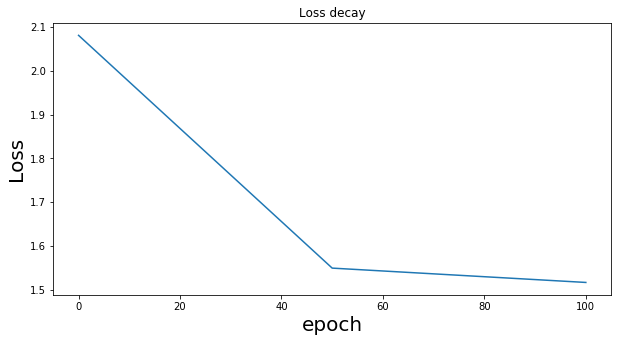

150 -th epoch trained


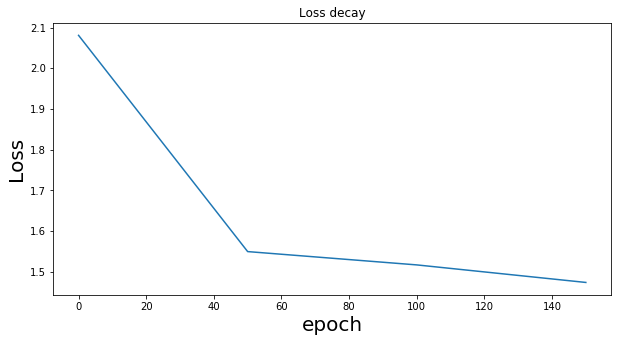

200 -th epoch trained


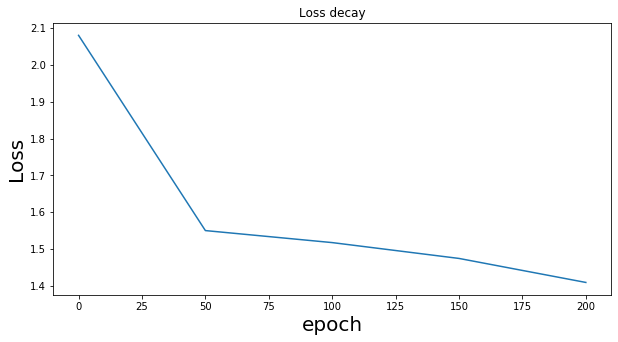

250 -th epoch trained


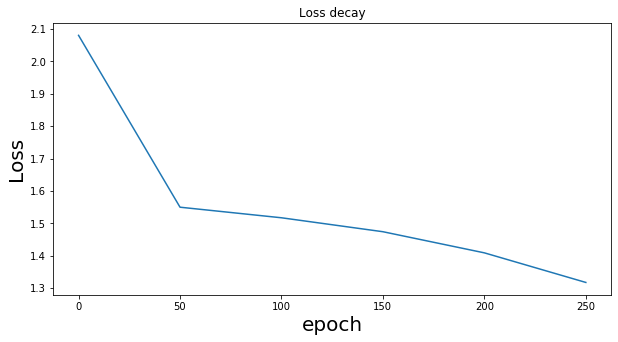

300 -th epoch trained


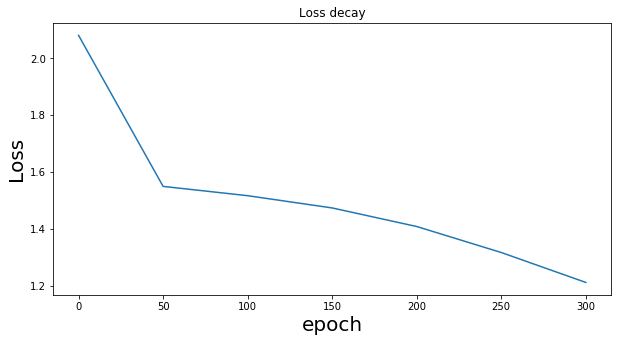

350 -th epoch trained


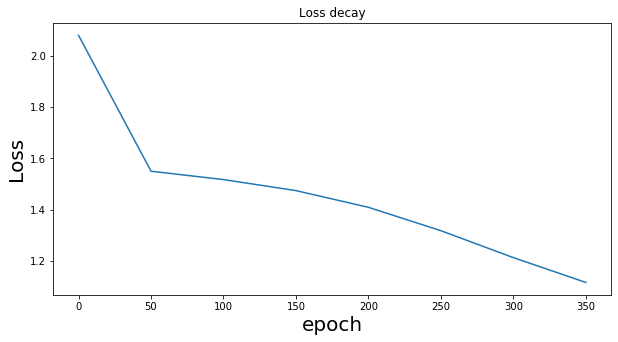

400 -th epoch trained


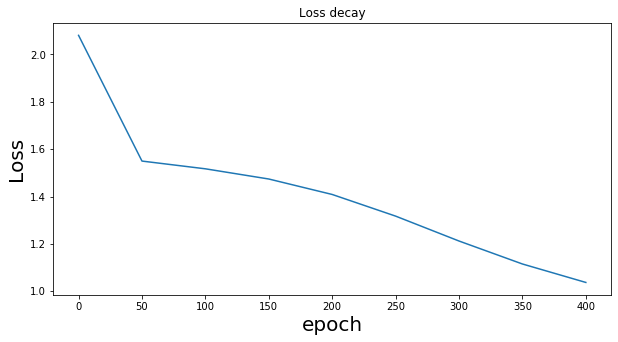

450 -th epoch trained


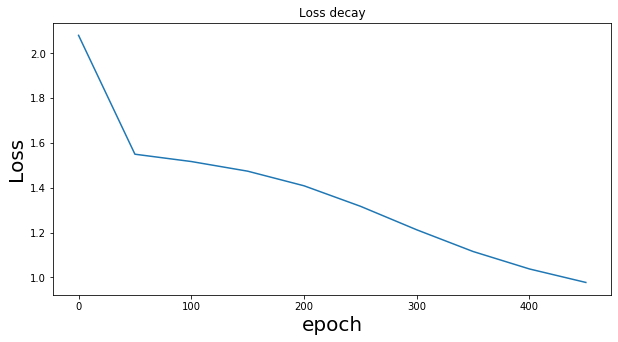

500 -th epoch trained


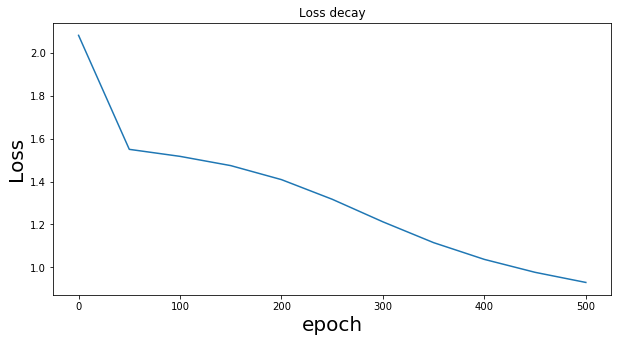

550 -th epoch trained


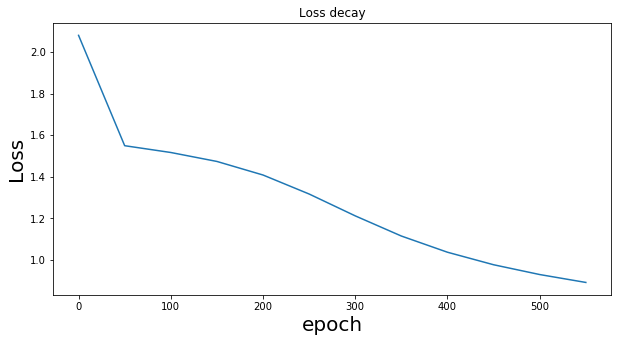

600 -th epoch trained


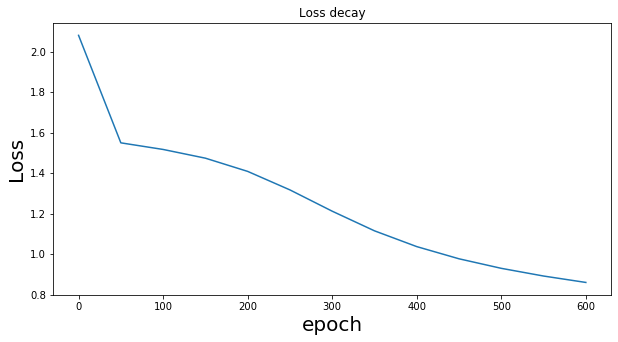

650 -th epoch trained


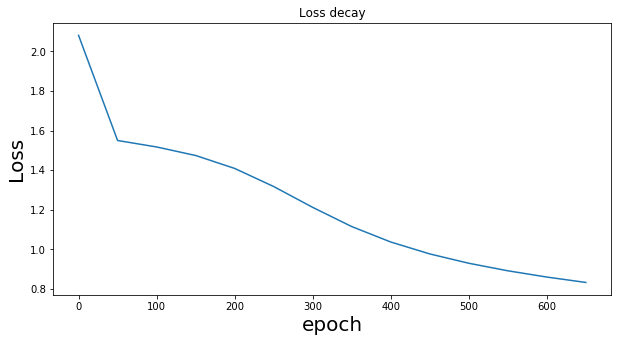

700 -th epoch trained


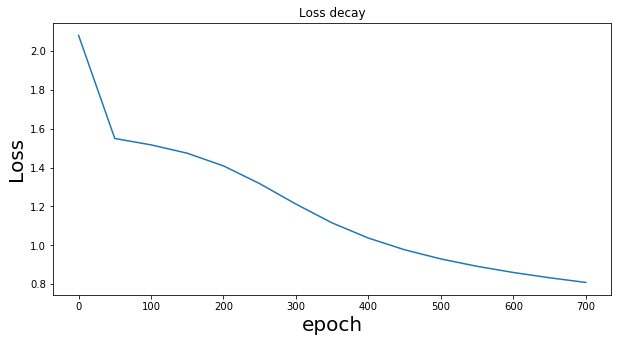

750 -th epoch trained


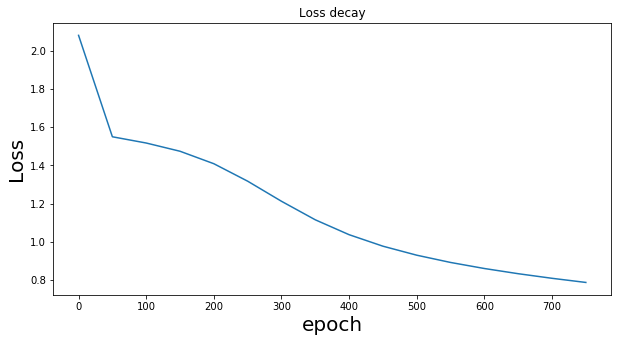

800 -th epoch trained


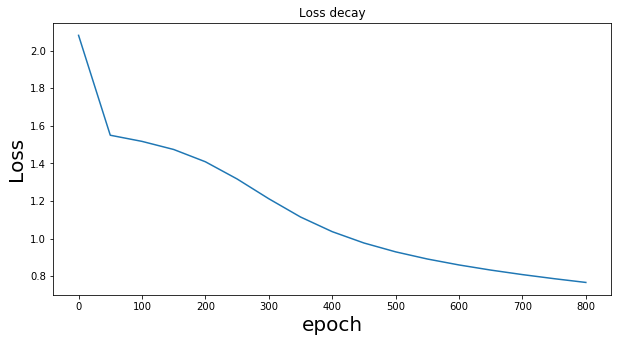

850 -th epoch trained


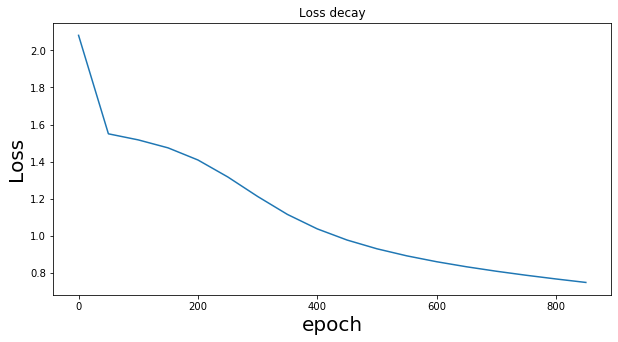

900 -th epoch trained


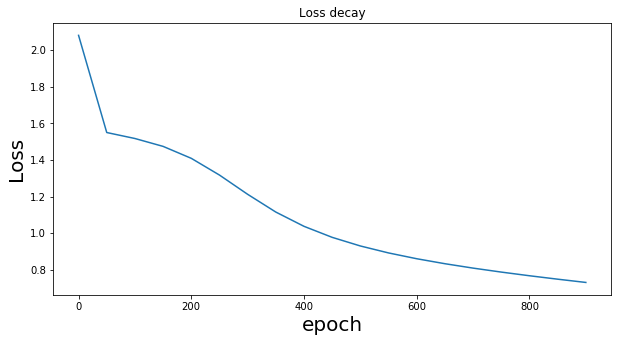

950 -th epoch trained


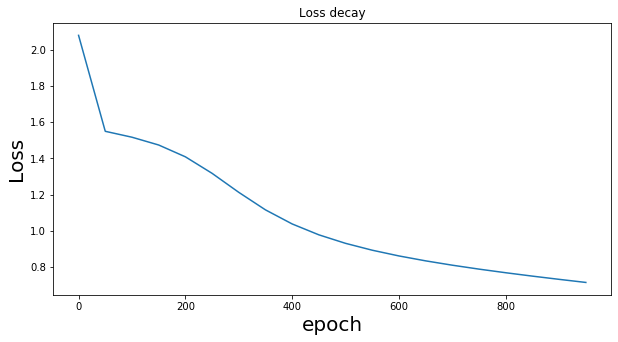

1000 -th epoch trained


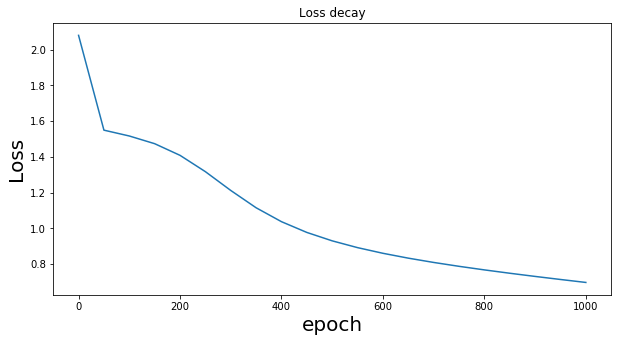

1050 -th epoch trained


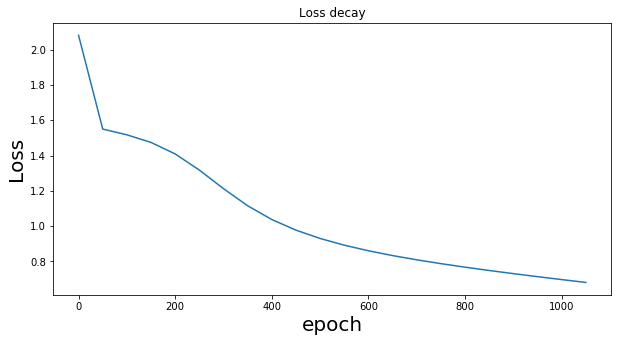

1100 -th epoch trained


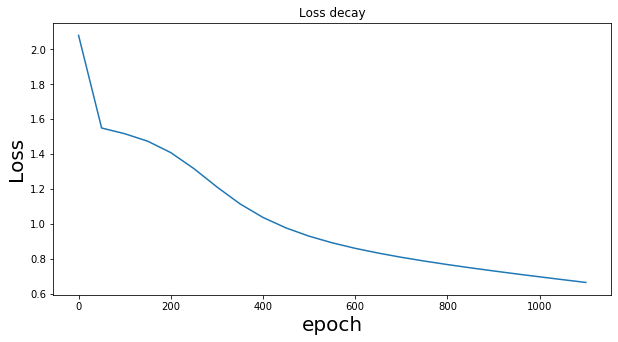

1150 -th epoch trained


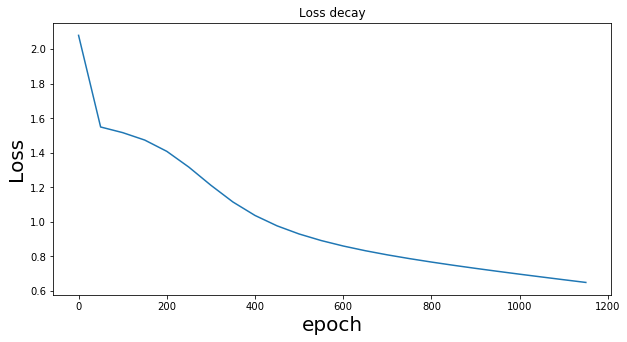

1200 -th epoch trained


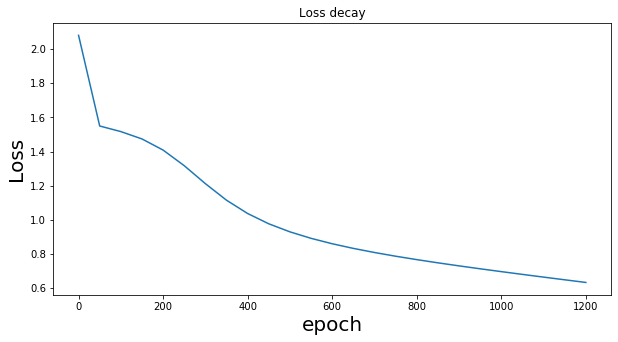

1250 -th epoch trained


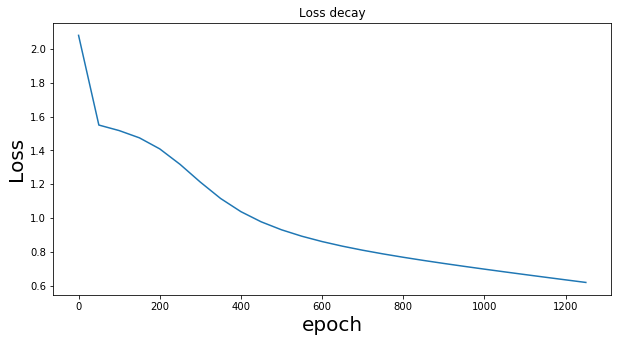

1300 -th epoch trained


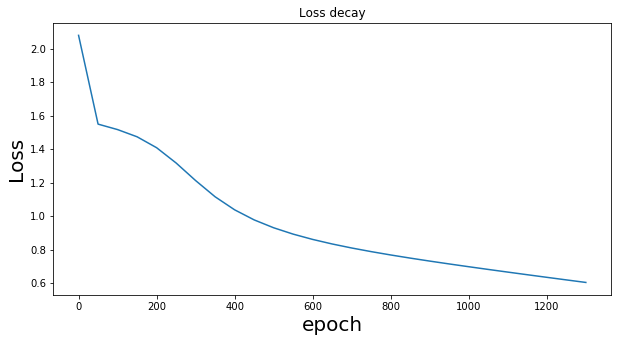

1350 -th epoch trained


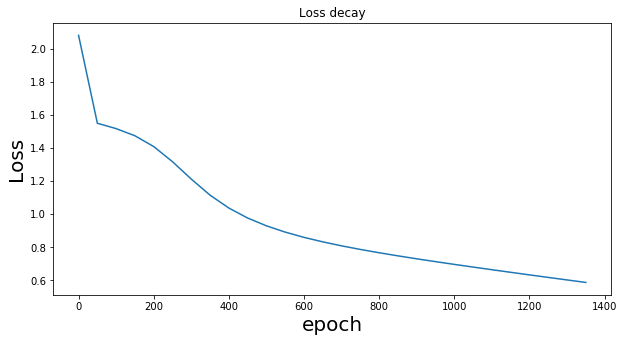

1400 -th epoch trained


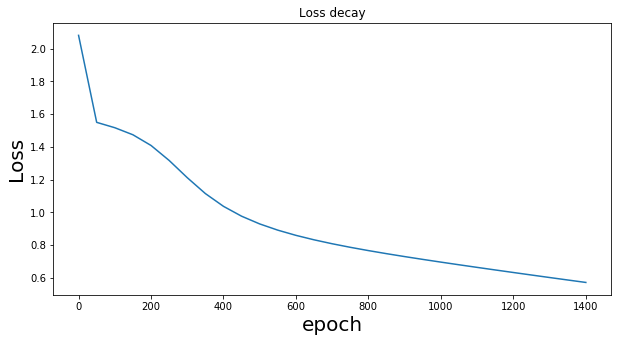

1450 -th epoch trained


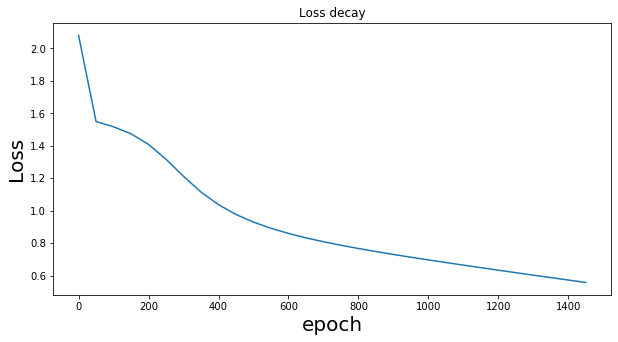

1500 -th epoch trained


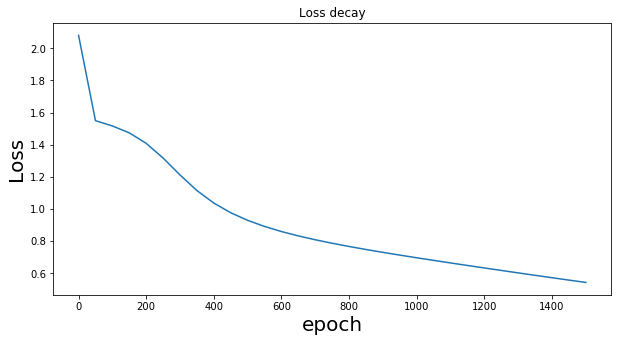

1550 -th epoch trained


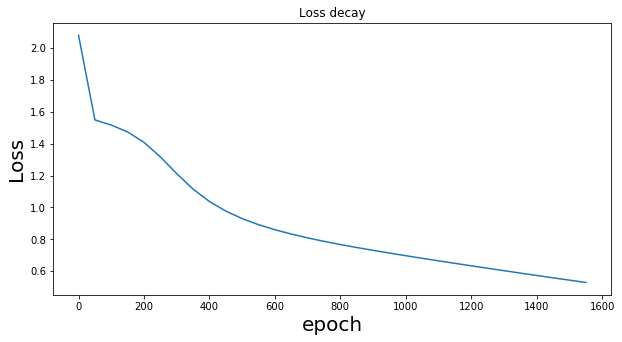

1600 -th epoch trained


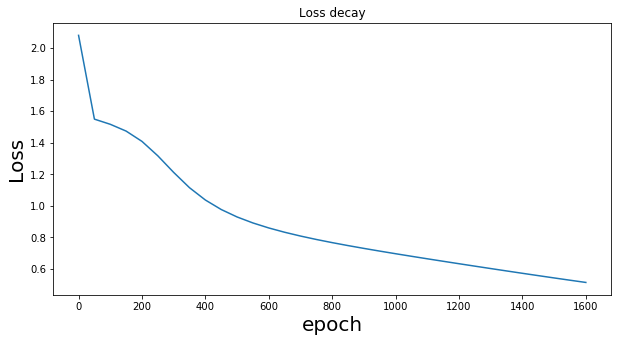

1650 -th epoch trained


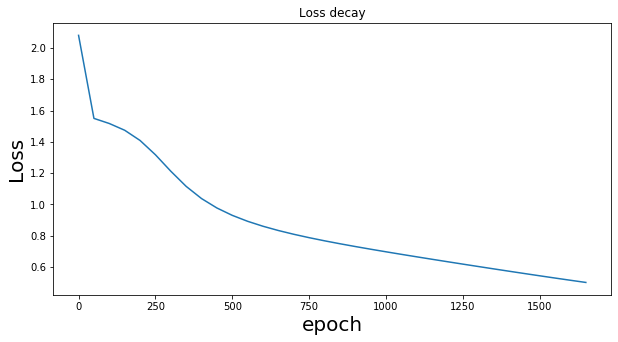

1700 -th epoch trained


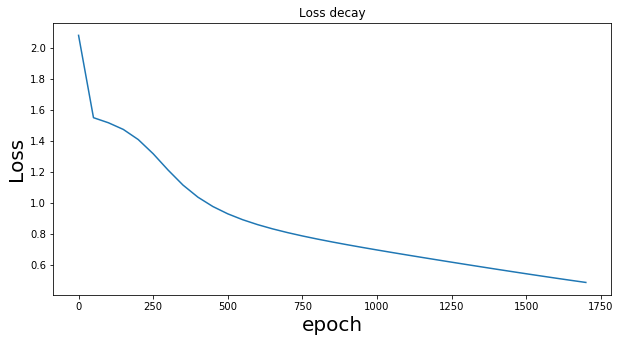

1750 -th epoch trained


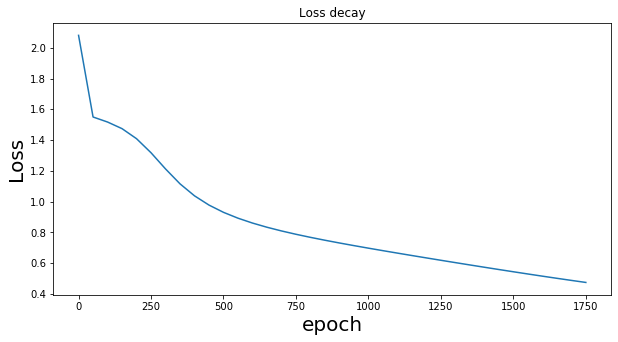

1800 -th epoch trained


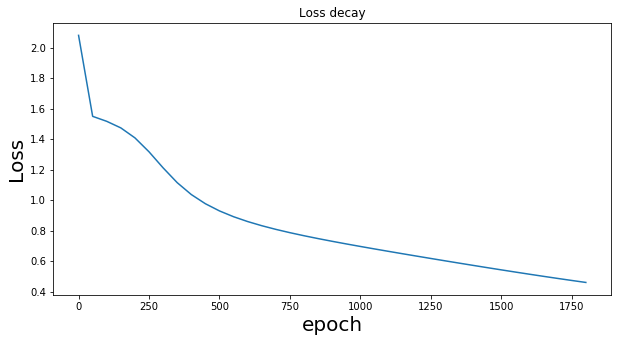

1850 -th epoch trained


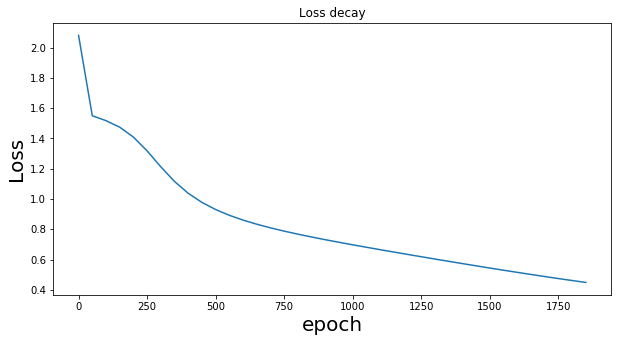

1900 -th epoch trained


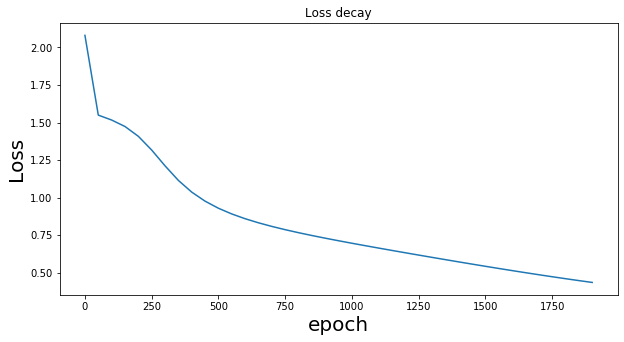

1950 -th epoch trained


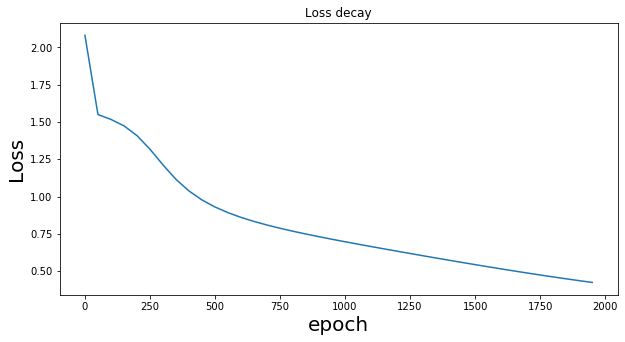

[0.01163112 0.94234043 0.09724773 0.00123548]
[0.01071787 0.02372583 0.99366043 0.01073184]
[0.01211575 0.03889255 0.65380019 0.17411072]
[0.01207327 0.0067703  0.22777615 0.8756926 ]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

input = [[0,0,1],[0,1,1],[1,0,1],[1,1,1]]
output = [0,1,1,0]

# HELLO ! --> H:[1 0 0 0], E:[0 1 0 0], L:[0 0 1 0], O:[0 0 0 1]
H=[1,0,0,0]; E=[0,1,0,0]; L=[0,0,1,0]; O=[0,0,0,1];
output = [E, L, L, O]
input = [H, E, L, L] 


N = np.size(input,0) # number of samples

Ni = np.size(input,1) # dimension of the samples of input

No = np.size(output,1) # dimension of the sample of output

Nh = 20 # number of hidden units


Ws = 2/np.sqrt(Ni+1)*(np.random.rand(Nh,Ni+1) - 0.5) # Xavier initialization

Wo = 2/np.sqrt(Nh)*(np.random.rand(No,Nh) - 0.5)  # Xavier initialization



alpha = 0.1 # Learning rate

t_ = []

loss_ = []

def sigmoid(x):
    f = 1/(1+np.exp(-x))
    return f

## train the model ====================================================================
h0 = np.zeros(Ni+1)
for epoch in range(0,2000):
    loss = 0
    for id_ in range(0,N):
        dWs = 0*Ws
        dWo = 0*Wo
        
        x = np.append(input[id_],1) + h0[:Ni+1]
        
        S = np.dot(Ws,x)
        
        if id_ != N:
            h0 = sigmoid(S);
        else:
            h0 = 0*sigmoid(S);
     

        y_ = np.dot(Wo,sigmoid(S))
        
        y = sigmoid(y_)
        
        d = output[id_]
            
        for j in range(0,Nh):
            for i in range(0,No):
                dWo[i,j] = dWo[i,j] + sigmoid(S[j])*y[i]*(1-y[i])*(y[i]-d[i])
                
        Wo = Wo - alpha*dWo
        
        for k in range(0,Ni+1):
            for j in range(0,Nh):
                for i in range(0,No):
                    dWs[j,k] = dWs[j,k] + x[k]*Wo[i,j]*sigmoid(S[j])*(1-sigmoid(S[j]))*y[i]*(1-y[i])*(y[i]-d[i]) 
        
        Ws = Ws - alpha*dWs
        
        loss = loss + 1/2*np.linalg.norm(y-d)
        
    if np.mod(epoch,50) == 0:
        print(epoch,"-th epoch trained")
            
        t_ = np.append(t_,epoch)
            
        loss_ = np.append(loss_,loss)
            
        plt.figure(num=0,figsize=[10,5])
        plt.plot(t_,loss_,marker="")
        plt.title('Loss decay')
        plt.xlabel('epoch',FontSize=20)
        plt.ylabel('Loss',FontSize=20)
        plt.show()
        print('====================================================================')

## test the trained model ====================================================================
h0 = np.zeros(Ni+1)
for id_ in range(0,N):
    x = np.append(input[id_],1) + h0[:Ni+1]
        
    S = np.dot(Ws,x)

    h0 = sigmoid(S);
        
    y_ = np.dot(Wo,sigmoid(S))
        
    y = sigmoid(y_)

    
    print(y)






